# Modeling and Analysis

In [72]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib.patches as patches

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams

from sklearn.utils import resample
from sklearn.decomposition import NMF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [73]:
vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
ss = SnowballStemmer(language='english')
def stemmer(arr):
    '''
    takes a corpus in an array and returns a simillar arr of stemmed words
    '''
    output = list()
    for text in arr:
        current = ""
        for word in text.split():
            current += ss.stem(word) + " "
        output.append(current)
    return output

def document_vectorizer(arr):
    step1 = stemmer(arr)
    step2 = vectorizer.fit_transform(np.array(step1))
    data = pd.DataFrame(step2.toarray(), columns = vectorizer.get_feature_names())
    return step2, data

## Initial Modeling

In [74]:
df = pd.read_csv('audience')

In [75]:
df

,Speaker,Labels,tokenized,Label2
0,o'malley,0,name martin omalley former mayor baltimore for...,0
1,o'malley,0,wife katie four great kids grace tara william ...,0
2,o'malley,0,like nothing wouldnt give healthier better lives,0
3,o'malley,0,things learned better life others,0
4,o'malley,0,15 years executive experience learned effectiv...,0
...,...,...,...,...
6050,sanders,0,democracy oligarchy,0
6051,sanders,0,believe weve got overturn citizens united move...,0
6052,sanders,0,right greatest wealthiest country history worl...,0
6053,sanders,0,stand fight back lot better,0


In [76]:
vector, vector_pd = document_vectorizer(df['tokenized'])

In [77]:
vector_pd

,01,025,065,08,10,100,10000,100000,1010,10th,...,youll,young,younger,youngest,youth,youtub,youv,zero,zip,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.189364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(vector_pd, df['Label2'])
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
y_pred_class = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

In [80]:
print(accuracy_score(y_test, y_pred_class))
print(precision_score(y_test, y_pred_class))
print(recall_score(y_test, y_pred_class))

0.9200792602377807
0.0
0.0


In [81]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_class = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

print(accuracy_score(y_test, lr_pred_class))
print(precision_score(y_test, lr_pred_class))
print(recall_score(y_test, lr_pred_class))

0.9214002642007926
1.0
0.008333333333333333


In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred_class = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

print(accuracy_score(y_test, rfc_pred_class))
print(precision_score(y_test, rfc_pred_class))
print(recall_score(y_test, rfc_pred_class))

0.9200792602377807
0.47058823529411764
0.06666666666666667


In [83]:
svm = LinearSVC(class_weight = 'balanced', random_state = 27)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_prob = clf.predict_proba(X_test)

In [84]:
print(accuracy_score(y_test, clf_pred))
print(precision_score(y_test, clf_pred))
print(recall_score(y_test, clf_pred))

0.9207397622192867
0.0
0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
X_train, X_test, y_train, y_test = train_test_split(vector_pd, df['Labels'])

In [86]:
X = pd.concat([X_train, y_train], axis=1)

In [87]:
cheer = X[X.Label2 == 1]
not_cheer = X[X.Label2 == 0]

cheer_upsampled = resample(cheer,
                          replace=True, # sample with replacement
                          n_samples=len(not_cheer), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_cheer, cheer_upsampled])

y_train = upsampled.Label2
X_train = upsampled.drop('Label2', axis=1)

svm = LinearSVC(class_weight = 'balanced', random_state = 27)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_prob = clf.predict_proba(X_test)
print(accuracy_score(y_test, clf_pred))
print(precision_score(y_test, clf_pred))
print(recall_score(y_test, clf_pred))

AttributeError: 'DataFrame' object has no attribute 'Label2'

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

print(accuracy_score(y_test, y_pred_class))
print(precision_score(y_test, y_pred_class))
print(recall_score(y_test, y_pred_class))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_class = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

print(accuracy_score(y_test, lr_pred_class))
print(precision_score(y_test, lr_pred_class))
print(recall_score(y_test, lr_pred_class))

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test, rfc_pred))
print(precision_score(y_test, rfc_pred))
print(recall_score(y_test, rfc_pred))

## Speaker Classification

In [23]:
df

,Speaker,Labels,tokenized,Label2
0,o'malley,0,name martin omalley former mayor baltimore for...,0
1,o'malley,0,wife katie four great kids grace tara william ...,0
2,o'malley,0,like nothing wouldnt give healthier better lives,0
3,o'malley,0,things learned better life others,0
4,o'malley,0,15 years executive experience learned effectiv...,0
...,...,...,...,...
6050,sanders,0,democracy oligarchy,0
6051,sanders,0,believe weve got overturn citizens united move...,0
6052,sanders,0,right greatest wealthiest country history worl...,0
6053,sanders,0,stand fight back lot better,0


In [24]:
df[df['Speaker'] == 'clinton']

,Speaker,Labels,tokenized,Label2
36,clinton,1,well thank thanks everyone hosting first democ...,0
37,clinton,1,hillary clinton,0
38,clinton,1,proud privileged serve first lady senator new ...,0
39,clinton,1,granddaughter factory worker grandmother wonde...,0
40,clinton,1,every day think need make sure opportunity ava...,0
...,...,...,...,...
6041,clinton,1,going take healthcare barriers,0
6042,clinton,1,going everything make sure unite country,0
6043,clinton,1,find common ground first lady senator secretar...,0
6044,clinton,1,also stand ground wherever matters principles ...,0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(vector_pd, df['Labels'])

In [89]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)
print(accuracy_score(y_test, y_pred_class))
print(precision_score(y_test, y_pred_class))
print(recall_score(y_test, y_pred_class))

0.726552179656539
0.74609375
0.5735735735735735


In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_class = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

print(accuracy_score(y_test, lr_pred_class))
print(precision_score(y_test, lr_pred_class))
print(recall_score(y_test, lr_pred_class))

0.7153236459709379
0.7112299465240641
0.5973053892215568


In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred_class = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

print(accuracy_score(y_test, rfc_pred_class))
print(precision_score(y_test, rfc_pred_class))
print(recall_score(y_test, rfc_pred_class))

0.6948480845442536
0.6839285714285714
0.5733532934131736


In [55]:
svm = LinearSVC(class_weight = 'balanced', random_state = 27)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_prob = clf.predict_proba(X_test)
print(accuracy_score(y_test, clf_pred))
print(precision_score(y_test, clf_pred))
print(recall_score(y_test, clf_pred))

0.7173051519154557
0.6967213114754098
0.6362275449101796


In [56]:
pres = pd.read_csv('Presidential')

In [57]:
pres = pres.drop('Line', axis = 1)

In [58]:
pres

,Speaker,Labels,tokenized
0,clinton,1,donald
1,clinton,1,well thank lester thanks hofstra hosting
2,clinton,1,central question election really kind country ...
3,clinton,1,today granddaughters second birthday think lot
4,clinton,1,first build economy works everyone top
...,...,...,...
3005,trump,0,education
3006,trump,0,jobs
3007,trump,0,african americans latinos ten lifetimes
3008,trump,0,shes done talk african americans latinos vote ...


In [90]:
vector, vector_pd = document_vectorizer(df['tokenized'])
pres_vector, pres_vector_pd = document_vectorizer(pres['tokenized'])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(pres_vector_pd, pres['Labels'])

In [113]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)
print(accuracy_score(y_test, y_pred_class))
print(precision_score(y_test, y_pred_class))
print(recall_score(y_test, y_pred_class))

0.8114209827357237
0.8382352941176471
0.6107142857142858


In [93]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_class = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

print(accuracy_score(y_test, lr_pred_class))
print(precision_score(y_test, lr_pred_class))
print(recall_score(y_test, lr_pred_class))

0.7583001328021248
0.8531073446327684
0.49185667752442996


In [118]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
tn, fp, fn, tp 

(440, 33, 109, 171)

In [63]:
svm = LinearSVC(class_weight = 'balanced', random_state = 27)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_prob = clf.predict_proba(X_test)
print(accuracy_score(y_test, clf_pred))
print(precision_score(y_test, clf_pred))
print(recall_score(y_test, clf_pred))

0.7556440903054449
0.7759336099585062
0.5899053627760252


In [64]:
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train, y_train)
rfc_pred_class = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

print(accuracy_score(y_test, rfc_pred_class))
print(precision_score(y_test, rfc_pred_class))
print(recall_score(y_test, rfc_pred_class))

0.7290836653386454
0.7927461139896373
0.48264984227129337


In [65]:
clf_prob[:,1]

array([0.18382316, 0.46580561, 0.09194471, 0.60002172, 0.63491523,
       0.16464701, 0.3389474 , 0.55752155, 0.14914592, 0.50118649,
       0.60324174, 0.70175843, 0.59645196, 0.35448217, 0.18626875,
       0.4992523 , 0.45535713, 0.06050078, 0.01228968, 0.14724086,
       0.70827936, 0.13840351, 0.64186019, 0.48867017, 0.21534212,
       0.68556938, 0.09834952, 0.70017915, 0.11739773, 0.48531762,
       0.71344784, 0.71242341, 0.15258186, 0.34671324, 0.11108451,
       0.53677548, 0.46173401, 0.49274415, 0.14594883, 0.48356874,
       0.33162185, 0.3423414 , 0.87052872, 0.16925925, 0.69512391,
       0.88581827, 0.88506752, 0.3389474 , 0.39746245, 0.08633042,
       0.29219346, 0.29955807, 0.01472287, 0.42465913, 0.41500496,
       0.27411323, 0.08392334, 0.46064432, 0.06533902, 0.14374951,
       0.09555398, 0.18644396, 0.24379672, 0.62821565, 0.11959777,
       0.09206156, 0.10778844, 0.7933483 , 0.3389474 , 0.09314506,
       0.14386984, 0.48387306, 0.44747969, 0.36747964, 0.14944

In [66]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

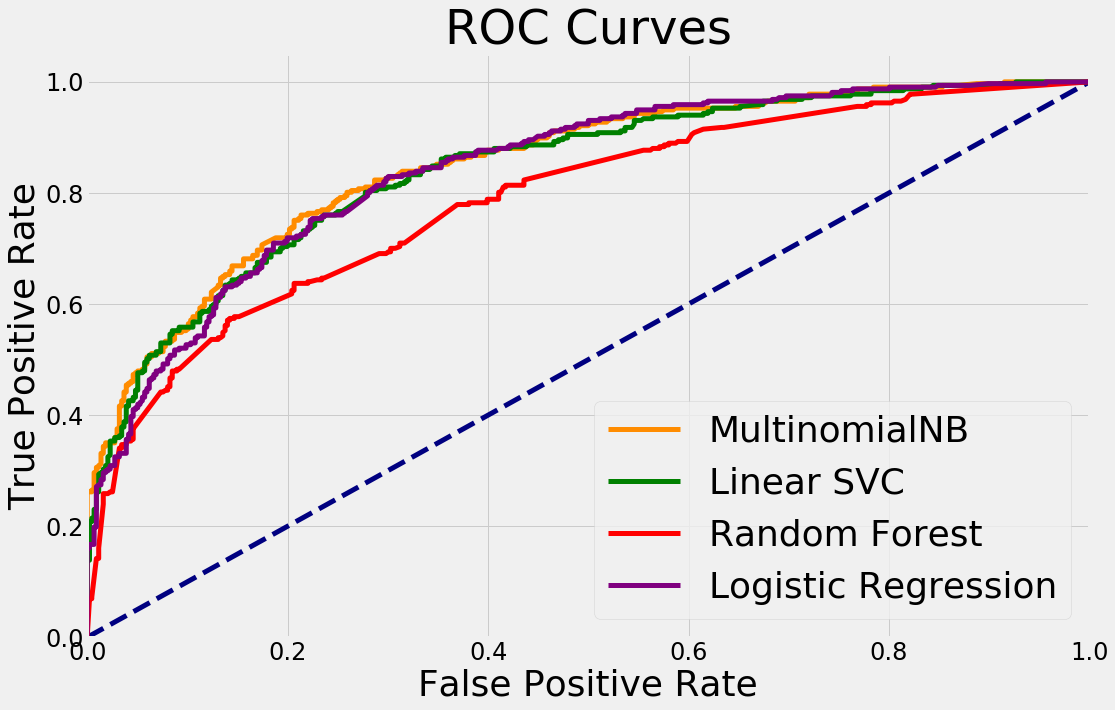

In [67]:
fpr = dict()
tpr = dict()

roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:,1])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_class.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lpr = dict()
ipr = dict()

loc_auc = dict()

for i in range(2):
    lpr[i], ipr[i], _ = roc_curve(y_test, clf_prob[:,1])
    
lpr["micro"], ipr["micro"], _ = roc_curve(y_test.ravel(), clf_pred.ravel())
loc_auc["micro"] = auc(lpr["micro"], ipr["micro"])

rpr = dict()
dpr = dict()
doc_auc = dict()

for i in range(2):
    rpr[i], dpr[i], _ = roc_curve(y_test, rfc_prob[:,1])
    
rpr["micro"], dpr["micro"], _ = roc_curve(y_test.ravel(), rfc_pred_class.ravel())
doc_auc["micro"] = auc(rpr["micro"], dpr["micro"])

xpr = dict()
zpr = dict()
doc_auc = dict()

for i in range(2):
    xpr[i], zpr[i], _ = roc_curve(y_test, lr_prob[:,1])
    
xpr["micro"], zpr["micro"], _ = roc_curve(y_test.ravel(), lr_pred_class.ravel())
doc_auc["micro"] = auc(xpr["micro"], zpr["micro"])


plt.figure(figsize = (16,10))
lw = 5
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='MultinomialNB')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(lpr[1], ipr[1], color='green',
        lw=5, label='Linear SVC')
plt.plot(rpr[1], dpr[1], color = 'red',
        lw=lw, label = 'Random Forest')
plt.plot(xpr[1], zpr[1], color = 'purple',
        lw=lw, label = 'Logistic Regression')
plt.xlim([0.0, 1.0])
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 36)
plt.ylabel('True Positive Rate', fontsize = 36)
plt.title('ROC Curves', fontsize = 48)
plt.legend(loc="lower right", fontsize= 36)
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_class).ravel()

In [70]:
tn, fp, fn, tp

(409, 27, 170, 147)

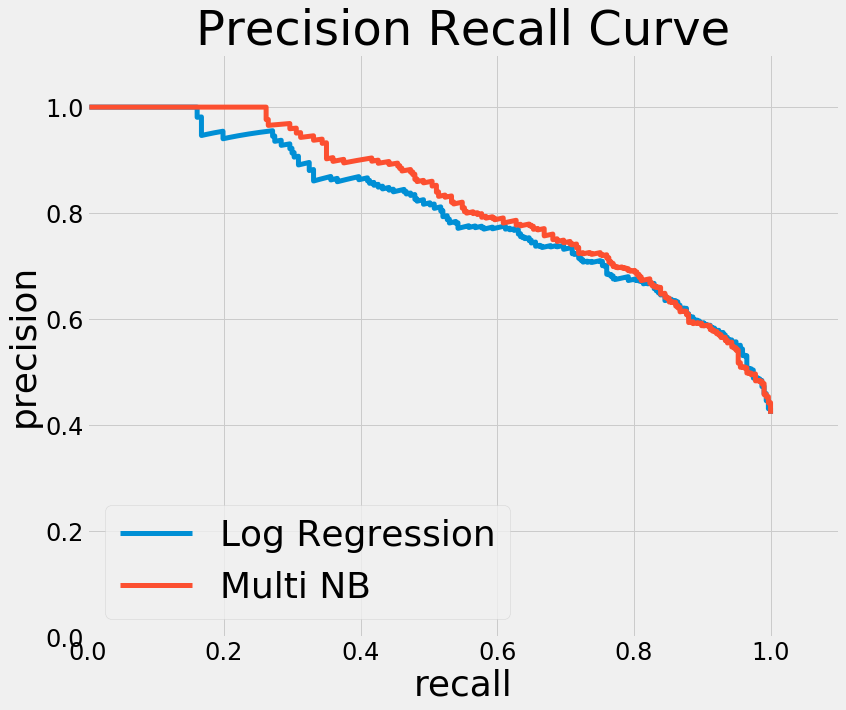

In [71]:
df = calculate_threshold_values(lr_prob[:,1], y_test)
df1 = calculate_threshold_values(y_prob[:,1], y_test)
fig, ax = plt.subplots(figsize = (12, 10))
ax.plot(df.tpr,df.precision, linewidth = 5, label = 'Log Regression')
    #ax.plot([0,1],[0,1], 'k')
ax.set_xlabel('recall', fontsize = 36)
ax.set_ylabel('precision', fontsize = 36)
#ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label = 'random', linewidth = 3)
ax.set_xlim(xmin=0,xmax=1)
ax.set_ylim(ymin=0,ymax=1)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
ax.set_title('Precision Recall Curve', fontsize=48)

ax.plot(df1.tpr,df1.precision, linewidth = 5, label = 'Multi NB')
ax.set_xlim(xmin=0,xmax=1.1)
ax.set_ylim(ymin=0,ymax=1.1)
ax.legend(fontsize = 36)